In [55]:
import json
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [4]:
with open('/Users/d777710/src/Python/test3/out/prepare_text/prepare_text_ATTACHMENT_3.jsonl', 'r') as f:
    texts = []
    for line in f:
        js = json.loads(line)
        texts.append(js['text'])

In [7]:
# Hyperparameters
n_features = 1000
n_topics = 20

In [10]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(texts)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [11]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
tf = tf_vectorizer.fit_transform(texts)
tf_feature_names = tf_vectorizer.get_feature_names()

In [12]:
# Run NMF
nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [13]:
# Run LDA
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', 
                                learning_offset=50.,random_state=0).fit(tf)

In [14]:
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('Topic %d:' % topic_idx)
        print(' '.join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [15]:
n_top_words = 10

In [16]:
display_topics(nmf, tfidf_feature_names, n_top_words)

Topic 0:
telstra board ceo directors limited nominee subsidiaries services notify pacnet
Topic 1:
delegations company framework set authority time purpose guidelines schedule job
Topic 2:
delegation rules comply exercising company 000 band million set 100
Topic 3:
2018 december restricted telstra 15 limits payment finance 14 22
Topic 4:
attorney powers power telstra executed exercise documents corporation company accountable
Topic 5:
order purchase contract issued authority executed properly execute approved approve
Topic 6:
term contract limit determine level regard period band example monetary
Topic 7:
issue amendments changes section reflect october sections gd2 sd1 gd1
Topic 8:
wholly owned group subsidiary invoices authority million approve unlimited payment
Topic 9:
approval transaction matter case pricing business board involves requires including
Topic 10:
act sra section authority employee rehabilitation src injured 36 37
Topic 11:
11 notifications board revocation office vari

In [ ]:
display_topics(lda, tf_feature_names, n_top_words)

In [18]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [21]:
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.080041  0.038395       1        1  36.428354
17     0.053363 -0.050061       2        1  20.723089
7     -0.020067  0.021778       3        1  13.043595
1     -0.012524 -0.002304       4        1   6.745044
4      0.010269 -0.006425       5        1   4.852500
15     0.005793  0.004447       6        1   3.319576
10    -0.008209  0.005009       7        1   3.146257
14    -0.008201 -0.002988       8        1   2.587417
2     -0.015855 -0.002405       9        1   1.622310
16    -0.014964  0.001098      10        1   1.530366
9     -0.001308 -0.002198      11        1   1.247073
5     -0.008154 -0.002725      12        1   0.880748
3     -0.007784  0.001799      13        1   0.880567
18    -0.002484  0.000108      14        1   0.632832
12    -0.012190  0.000543      15        1   0.566951
11    -0.005697  0.000208      16        1   0.548548
13    -0.008297 -0.003674      17        1   0.372066
8     -0.010365 -0.001095      18        1   0.309778
0     -0.006666  0.000050      19        1   0.281466
19    -0.006699  0.000442      20        1   0.281466, topic_info=     Category        Freq            Term       Total  loglift  logprob
term                                                                   
106   Default   41.000000         company   41.000000  30.0000  30.0000
91    Default   29.000000             ceo   29.000000  29.0000  29.0000
135   Default   31.000000      delegation   31.000000  28.0000  28.0000
54    Default   26.000000        approval   26.000000  27.0000  27.0000
136   Default   34.000000     delegations   34.000000  26.0000  26.0000
296   Default   25.000000         million   25.000000  25.0000  25.0000
462   Default  103.000000         telstra  103.000000  24.0000  24.0000
79    Default   36.000000           board   36.000000  23.0000  23.0000
15    Default   16.000000            2018   16.000000  22.0000  22.0000
83    Default   19.000000        business   19.000000  21.0000  21.0000
71    Default   21.000000            band   21.000000  20.0000  20.0000
128   Default   15.000000        december   15.000000  19.0000  19.0000
428   Default   24.000000        services   24.000000  18.0000  18.0000
404   Default   14.000000      restricted   14.000000  17.0000  17.0000
0     Default   15.000000             000   15.000000  16.0000  16.0000
471   Default   19.000000     transaction   19.000000  15.0000  15.0000
463   Default   13.000000            term   13.000000  14.0000  14.0000
393   Default   13.000000    remuneration   13.000000  13.0000  13.0000
439   Default   14.000000       specified   14.000000  12.0000  12.0000
56    Default   18.000000         approve   18.000000  11.0000  11.0000
96    Default   10.000000         changes   10.000000  10.0000  10.0000
116   Default   22.000000        contract   22.000000   9.0000   9.0000
375   Default   21.000000        purchase   21.000000   8.0000   8.0000
124   Default   11.000000          credit   11.000000   7.0000   7.0000
472   Default   14.000000    transactions   14.000000   6.0000   6.0000
69    Default   12.000000       authority   12.000000   5.0000   5.0000
225   Default   15.000000           group   15.000000   4.0000   4.0000
196   Default   12.000000         finance   12.000000   3.0000   3.0000
453   Default   14.000000      subsidiary   14.000000   2.0000   2.0000
108   Default   14.000000          comply   14.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
349   Topic20    0.021342           place    4.467954   0.5289  -6.1438
487   Topic20    0.020274      variations    4.244322   0.5289  -6.1951
95    Topic20    0.022662          change    4.774517   0.5226  -6.0837
283   Topic20    0.025675          listed    5.443034   0.5163  -5.9589
330   Topic20    0.023226        original    4.957155   0.5096  -6.0592
371   Topic20    0.022720        

In [ ]:
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')

In [29]:
# Log Likelyhood: Higher the better
print('Log Likelihood: ', lda.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print('Perplexity: ', lda.perplexity(tf))

# See model parameters
pprint(lda.get_params())

Log Likelihood:  -34140.60646265542
Perplexity:  15773.449118282728
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 50.0,
 'max_doc_update_iter': 100,
 'max_iter': 5,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': None,
 'n_topics': None,
 'perp_tol': 0.1,
 'random_state': 0,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [56]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tf)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_components': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tf))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -10409.152188986553
Model Perplexity:  384.80185379628284


In [35]:
n_topics = 10

In [36]:
# Run NMF
nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [37]:
# Run LDA
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', 
                                learning_offset=50.,random_state=0).fit(tf)

In [38]:
display_topics(nmf, tfidf_feature_names, n_top_words)

Topic 0:
telstra board ceo directors nominee notify limited subsidiaries committee appointments
Topic 1:
delegations company framework set authority time purpose guidelines schedule job
Topic 2:
delegation rules comply exercising company 000 band million sub set
Topic 3:
2018 december restricted telstra 15 limits finance payment 14 22
Topic 4:
attorney powers power telstra executed documents exercise deed corporation execute
Topic 5:
contract term purchase determining orders contracts limit order determine value
Topic 6:
10 11 notifications revocation variation ceo board million secretary office
Topic 7:
issue amendments section changes reflect sections october gd2 gd1 sd1
Topic 8:
authority approve wholly owned group subsidiary invoices unlimited payment million
Topic 9:
approval transaction matter case business pricing board requires involves including


In [ ]:
display_topics(lda, tf_feature_names, n_top_words)

In [43]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [44]:
lda_output = best_lda_model.transform(tf)

In [53]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=10, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Weights for the 10 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.12  0.48  0.13  0.64  0.42  0.2   0.2   0.07  0.12  0.23]
 [-0.03 -0.66 -0.01  0.71 -0.18 -0.01 -0.11 -0.02 -0.03 -0.11]]
Perc of Variance Explained: 
 [0.04 0.18]


Text(0.5,1,'Segregation of Topic Clusters')

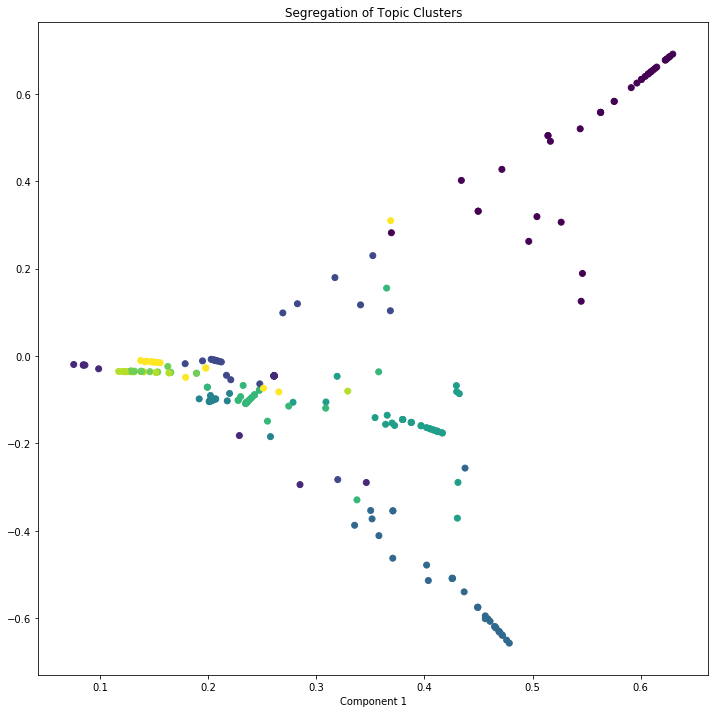

In [54]:
# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

In [60]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=10, no_above=0.2)

In [ ]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)